In [79]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [81]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##Replacing balnks with 0 as a tenure is 0 and no total charges are recorded

In [82]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [85]:
df.isnull().sum().sum()

0

In [86]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [87]:
df["customerID"].duplicated().sum()

0

In [88]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

#Converted 0 and 1 value to yes and no value to make it easier to understand

In [89]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


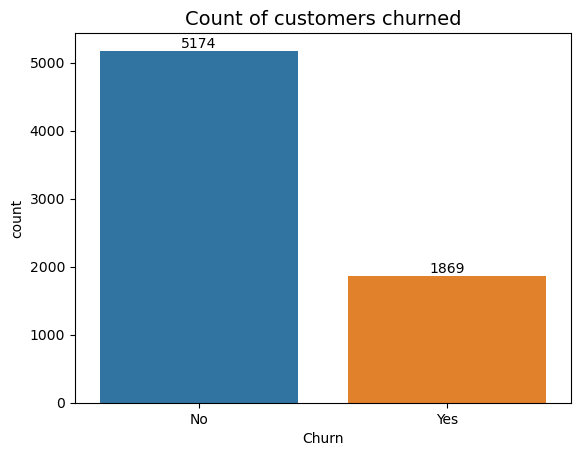

In [90]:
ax = sns.countplot(x = 'Churn', data = df)
    
ax.bar_label(ax.containers[0])
plt.title("Count of customers churned", fontsize = 14)
plt.show()

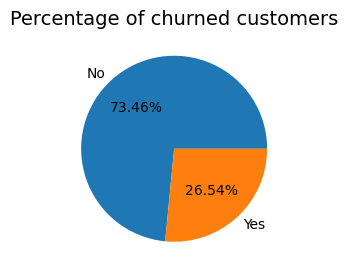

In [91]:
plt.figure(figsize = (3,5))
gb = df.groupby('Churn').agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of churned customers", fontsize = 14)
plt.show()

#From the given pie chart we can conclude that 26.54% customers have churned out.
#NOW LETS EXPLORE THE REASON BEHIND IT 

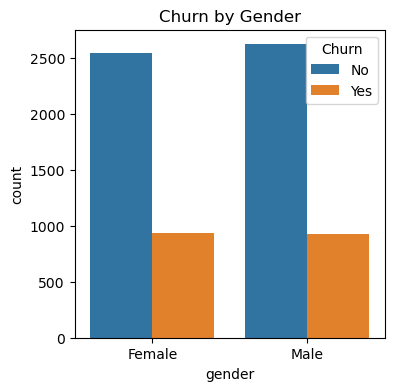

In [92]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

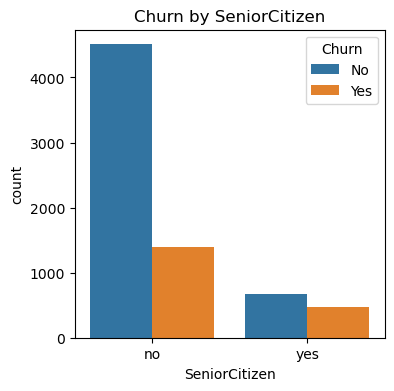

In [93]:
plt.figure(figsize = (4,4))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

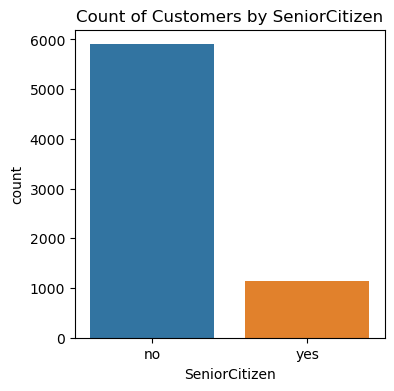

In [94]:
plt.figure(figsize = (4,4))
sns.countplot(x = "SeniorCitizen", data = df)
plt.title("Count of Customers by SeniorCitizen")
ax.bar_label(ax.containers[0])
plt.show()

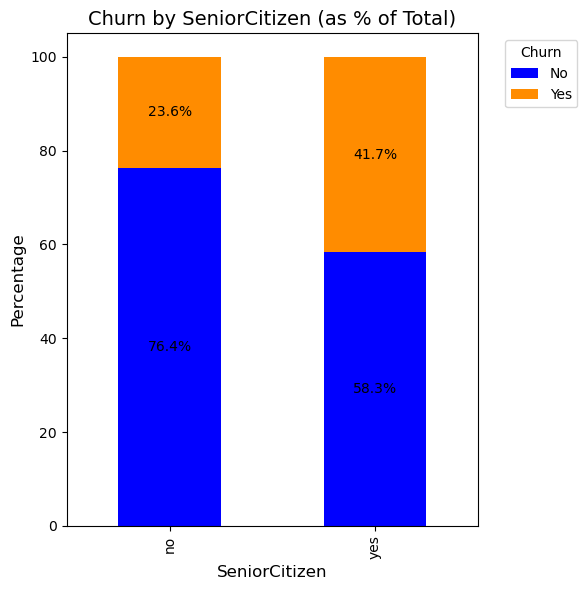

In [95]:
data = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
total_counts = data.groupby('SeniorCitizen')['Count'].transform('sum')
data['Percentage'] = (data['Count'] / total_counts) * 100

# Pivot the data for stacked bar chart
pivot_data = data.pivot(index='SeniorCitizen', columns='Churn', values='Percentage').fillna(0)

# Plot the stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(6, 6), color=['blue', 'darkorange'])

# Add percentage labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only annotate non-zero bars
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', 
                ha='center', va='center', fontsize=10, color='black')

# Add labels and title
plt.title('Churn by SeniorCitizen (as % of Total)', fontsize=14)
plt.xlabel('SeniorCitizen', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Compartivel of a larger number have been churned out in Senior citizen Section

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


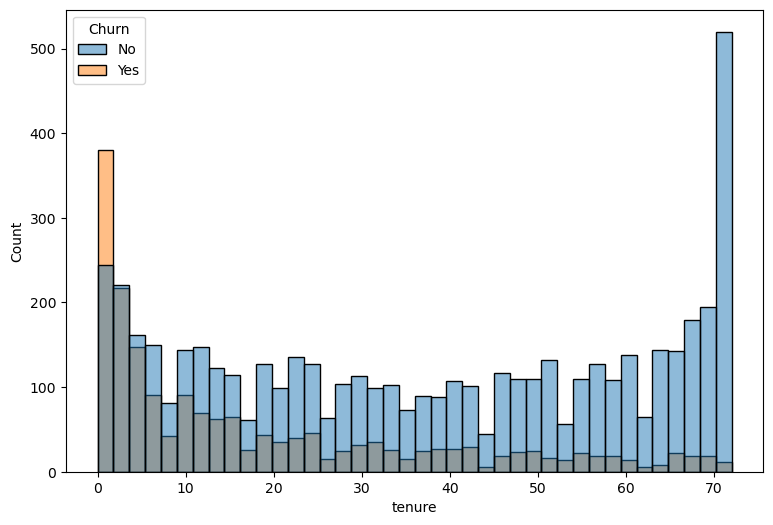

In [96]:
plt.figure(figsize = (9,6))
sns.histplot(x = "tenure", data = df, bins = 40, hue = "Churn")
plt.show()

#People who have used our services for a long time have stayed and people who have used for 1 or 2 months have churned

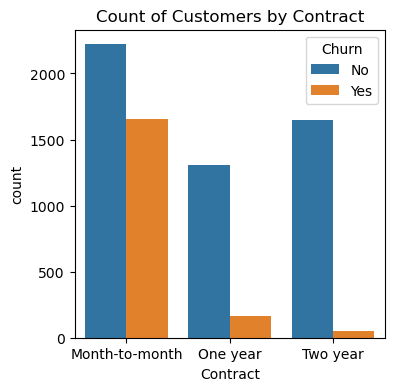

In [97]:
plt.figure(figsize = (4,4))
sns.countplot(x = "Contract", data = df, hue = "Churn")
plt.title("Count of Customers by Contract")
ax.bar_label(ax.containers[0])
plt.show()

#People who have month to month contract are likely to churn as compared to people who are having yearly contract 

In [98]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

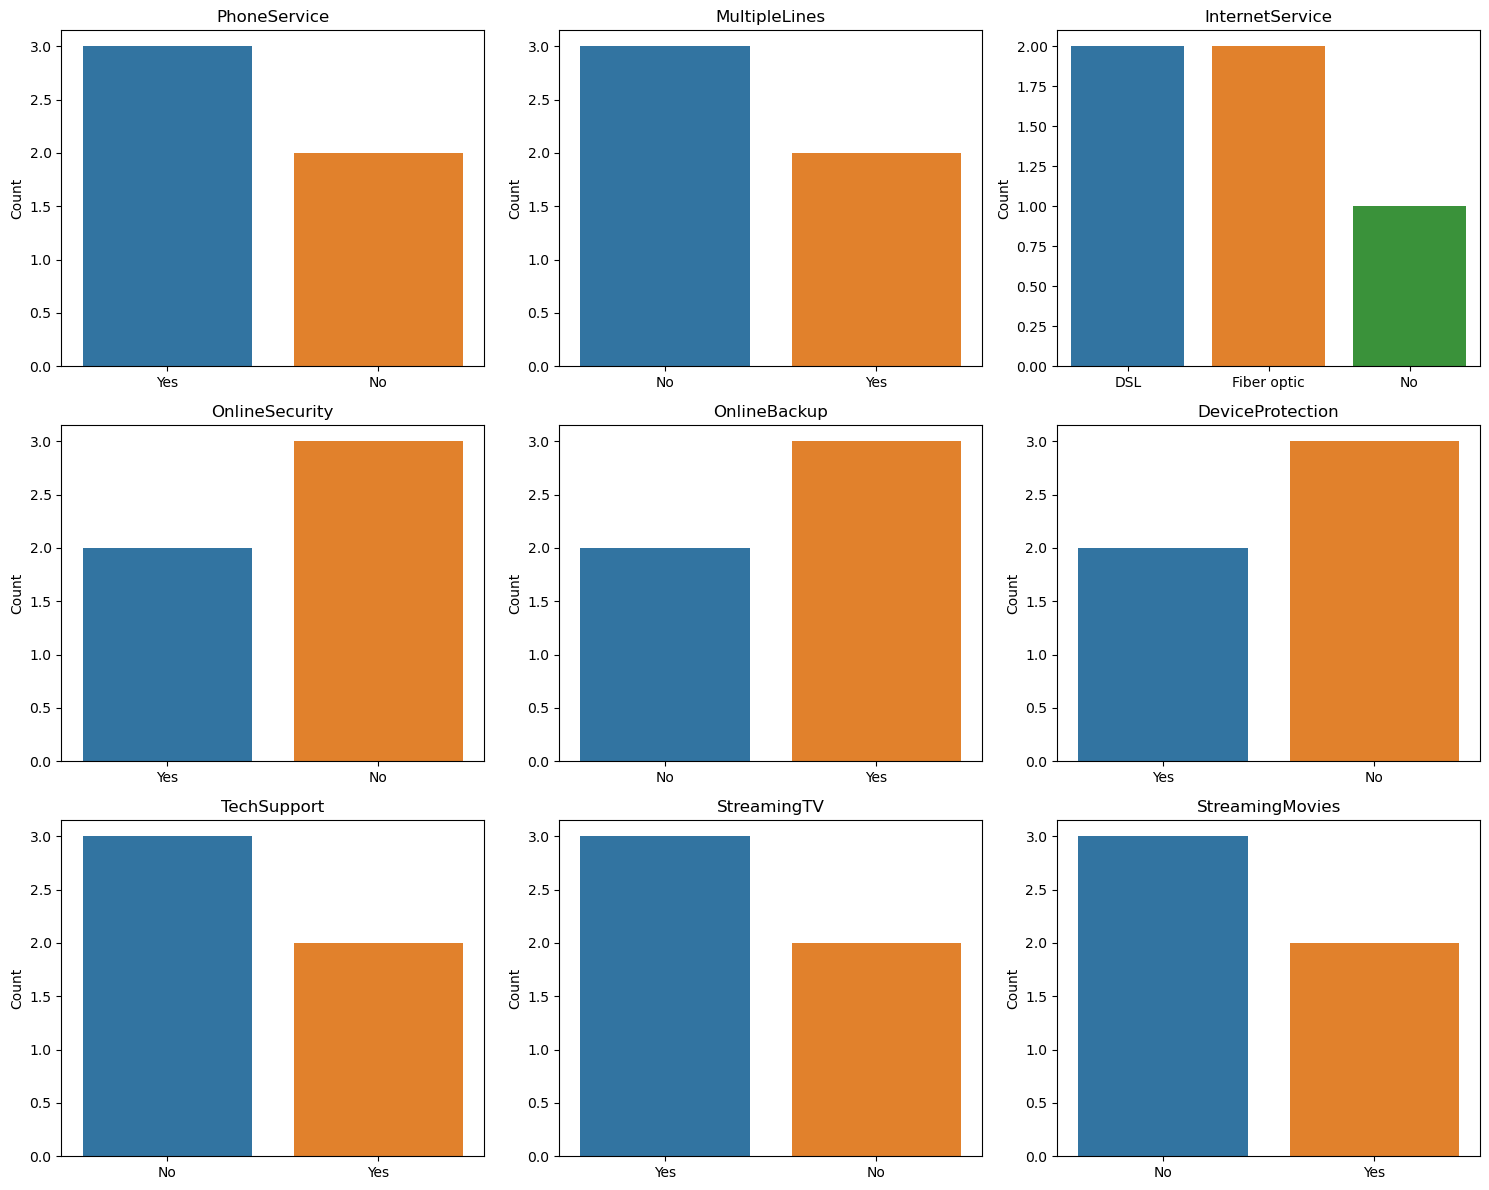

In [99]:
# Example DataFrame
data = {
    'PhoneService': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'MultipleLines': ['No', 'Yes', 'No', 'Yes', 'No'],
    'InternetService': ['DSL', 'Fiber optic', 'DSL', 'No', 'Fiber optic'],
    'OnlineSecurity': ['Yes', 'No', 'No', 'Yes', 'No'],
    'OnlineBackup': ['No', 'Yes', 'Yes', 'No', 'Yes'],
    'DeviceProtection': ['Yes', 'No', 'No', 'Yes', 'No'],
    'TechSupport': ['No', 'Yes', 'No', 'No', 'Yes'],
    'StreamingTV': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'StreamingMovies': ['No', 'Yes', 'No', 'Yes', 'No'],
}

df = pd.DataFrame(data)

# List of columns
columns = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplots
n_cols = 3  # Number of columns per row
n_rows = -(-len(columns) // n_cols)  # Calculate number of rows using ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove empty subplots if the number of columns is not a multiple of n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#From the provided image, each subplot visualizes the distribution of categorical responses for services like PhoneService, MultipleLines, InternetService, and others. Most services exhibit binary categories (e.g., "Yes" and "No"), with varying dominance in each case. Notable patterns include "No" being more prevalent in services like OnlineSecurity, OnlineBackup, and DeviceProtection, while PhoneService and InternetService (DSL and Fiber optic) show balanced distributions across their categories.

In [102]:
plt.figure(figsize = (5,6))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
plt.title("Churn Customers by Payment Method")
ax.bar_label(ax.containers[0])
plt.show()

ValueError: Could not interpret input 'PaymentMethod'

<Figure size 500x600 with 0 Axes>